In [11]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#loading the dataset
df= pd.read_csv('amazon.csv')
print('Original dataset: ')
print(df.head())

Original dataset: 
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349   

In [13]:
#cleaning the dataset
df.columns=[col.strip().replace(' ', '_') for col in df.columns]

In [14]:
# removing currency symbols and converting to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

In [15]:
# cleaning rating, rating_count
df['rating']= pd.to_numeric(df['rating'], errors='coerce')
df['rating_count']= df['rating_count'].str.replace(',', '')
df['rating_count']= pd.to_numeric(df['rating_count'], errors='coerce')

In [16]:
# dropping rows with missing values in key fields
df.dropna(subset=['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'], inplace=True)

In [17]:
# exploratory data analysis (EDA)
print('\n Basic Statistics: ')
print(df.describe())


Basic Statistics: 
       discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000  


In [18]:
print('\n Value counts for category: ')
print(df['category'].value_counts())


 Value counts for category: 
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          231
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles               

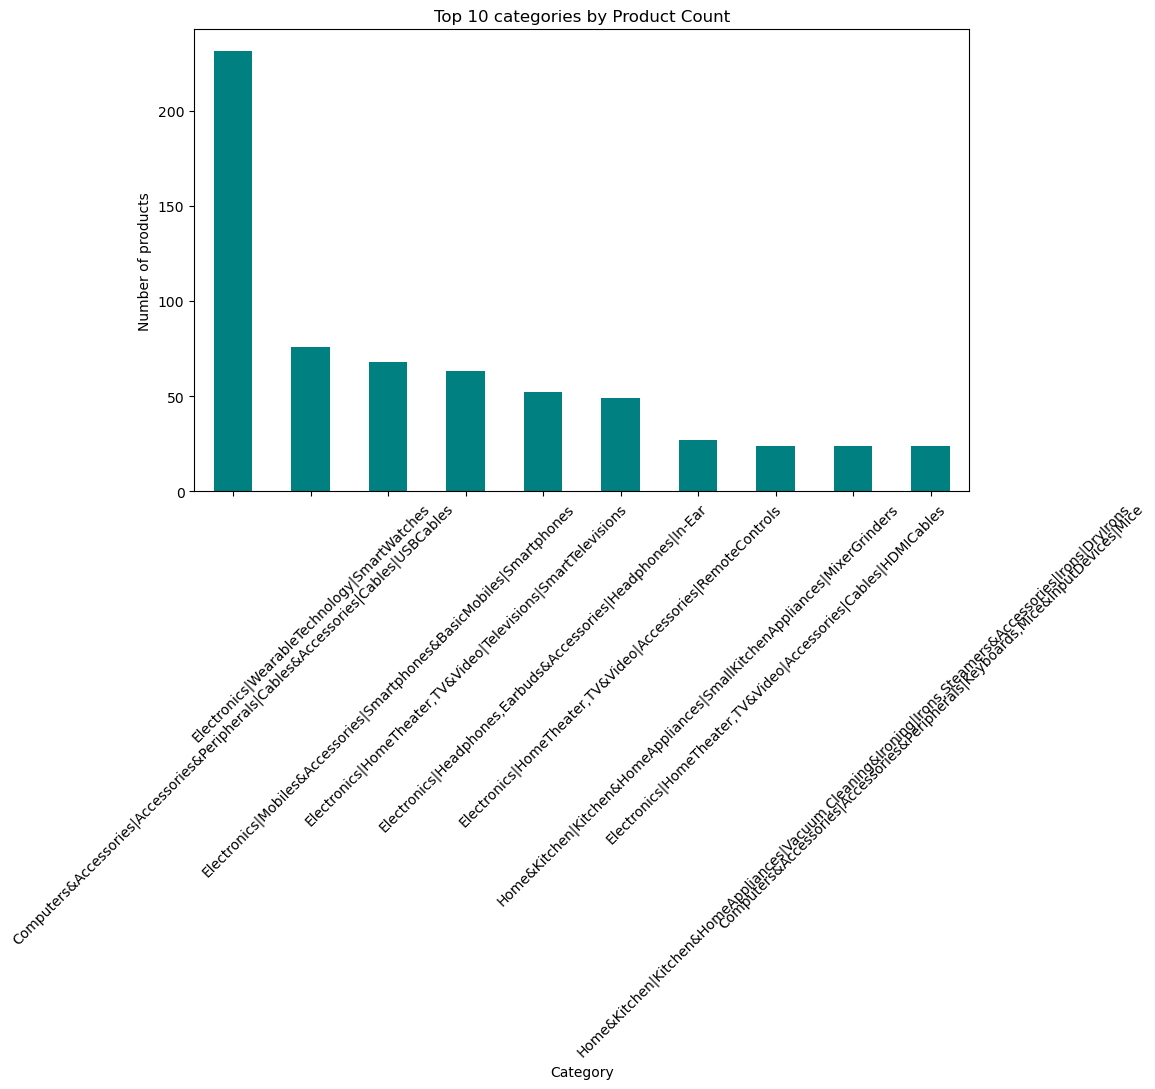

In [20]:
# Visualizations
plt.figure(figsize= (10,6))
df['category'].value_counts().head(10).plot(kind= 'bar', color= 'teal')
plt.title('Top 10 categories by Product Count')
plt.xlabel('Category')
plt.ylabel('Number of products')
plt.xticks(rotation=45)
plt.show()

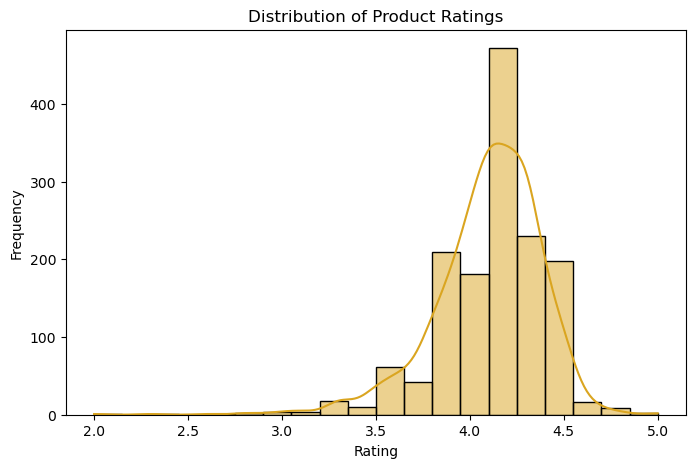

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color= 'goldenrod')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

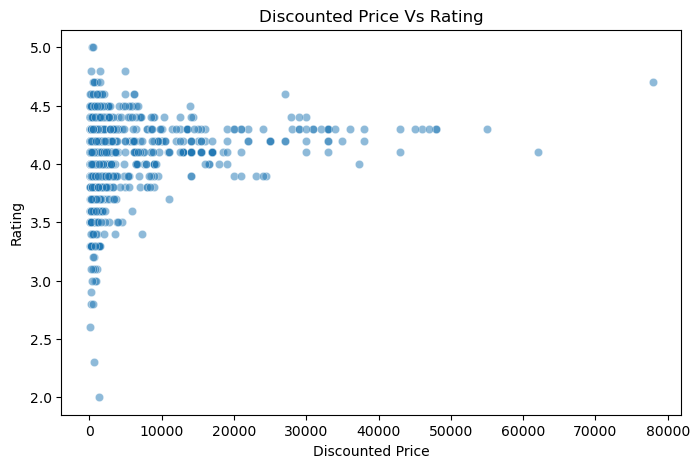

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.5)
plt.title('Discounted Price Vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

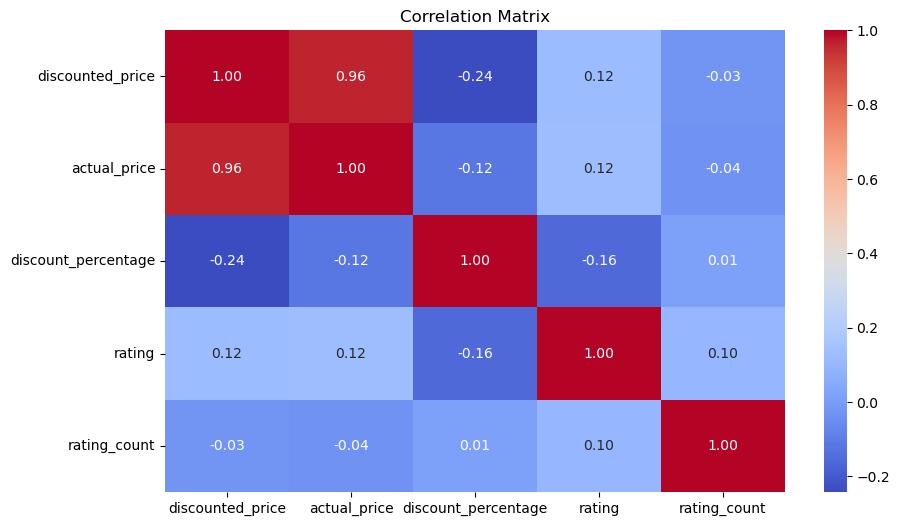

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
print('\nInsights')
top_categories= df['category'].value_counts().head(5)
print('Top 5 categories: \n', top_categories)


Insights
Top 5 categories: 
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    231
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64


In [27]:
best_products= df.sort_values(by= 'rating', ascending=False).head(5)
print('\n Top 5 Rated Products: \n', best_products[['product_name', 'rating', 'discounted_price']])


 Top 5 Rated Products: 
                                            product_name  rating  \
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0   
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0   
1201  Oratech Coffee Frother electric, milk frother ...     4.8   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8   
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8   

      discounted_price  
775              499.0  
174              399.0  
1201             279.0  
1299            4995.0  
1145            1439.0  


In [28]:
most_reviewed= df.sort_values(by= 'rating_count', ascending=False).head(5)
print("\nTop 5 Most Reviewed Products:\n", most_reviewed[['product_name', 'rating_count']])


Top 5 Most Reviewed Products:
                                           product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
